# Sperm Image Classification

#### using cat-dog image template (https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part1.ipynb#scrollTo=RXZT2UsyIVe_) 

In [1]:
#import files from local zip

from google.colab import files
uploaded = files.upload()

Saving data-colab.zip to data-colab.zip


In [0]:
#unzip files 

import zipfile
import io
zf = zipfile.ZipFile(io.BytesIO(uploaded['data-colab.zip']), "r")
zf.extractall()

In [3]:
#data is in hidden "content" folder 
#using gdrive is much slower access 

import os 

print(os.getcwd())
base_dir = '/content/data-colab/data_sperm'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# Directory with our training cat pictures
train_abnorm_dir = os.path.join(train_dir, 'abnormal')

# Directory with our training dog pictures
train_norm_dir = os.path.join(train_dir, 'normal')

# Directory with our validation cat pictures
validation_abnorm_dir = os.path.join(validation_dir, 'abnormal')

# Directory with our validation dog pictures
validation_norm_dir = os.path.join(validation_dir, 'normal')

/content


In [4]:
#confirm files are correct

train_abnorm_fnames = os.listdir(train_abnorm_dir)
print train_abnorm_fnames[:10]

train_norm_fnames = os.listdir(train_norm_dir)
train_norm_fnames.sort()
print train_norm_fnames[:10]

['sperm_morph_892.jpeg', 'sperm_morph_93.jpeg', 'sperm_morph_187.jpeg', 'sperm_morph_857.jpeg', 'sperm_morph_465.jpeg', 'sperm_morph_499.jpeg', 'sperm_morph_292.jpeg', 'sperm_morph_40.jpeg', 'sperm_morph_48.jpeg', 'sperm_morph_149.jpeg']
['sperm_morph_06.jpeg', 'sperm_morph_09.jpeg', 'sperm_morph_10.jpeg', 'sperm_morph_1001.jpeg', 'sperm_morph_114.jpeg', 'sperm_morph_125.jpeg', 'sperm_morph_14.jpeg', 'sperm_morph_15.jpeg', 'sperm_morph_16.jpeg', 'sperm_morph_169.jpeg']


In [6]:
#confirm number of training/val examples 

print 'total training abnormal images:', len(os.listdir(train_abnorm_dir))
print 'total training normal images:', len(os.listdir(train_norm_dir))
print 'total validation abnormal images:', len(os.listdir(validation_abnorm_dir))
print 'total validation normal images:', len(os.listdir(validation_norm_dir))

total training abnormal images: 389
total training normal images: 135
total validation abnormal images: 104
total validation normal images: 27


In [31]:
#accuracy

#precision

#recall

# Precision: 
#Given an observation whose predicted result is positive, what is the probability that it actually belongs to the positive class?

# Recall: 
#Out of all the observations in the positive class, how many of them were predicted as positive?

abnorm = len(os.listdir(validation_abnorm_dir))
norm = len(os.listdir(validation_norm_dir))

recall = abnorm/abnorm
print("recall ", recall)

precision = abnorm *1.0 /(norm + abnorm) * 1.0
print("precision", precision)

accuracy = abnorm * 1.0 /(norm + abnorm) * 1.0
print("accuracy", accuracy)



('recall ', 1)
('precision', 0.7938931297709924)
('accuracy', 0.7938931297709924)


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

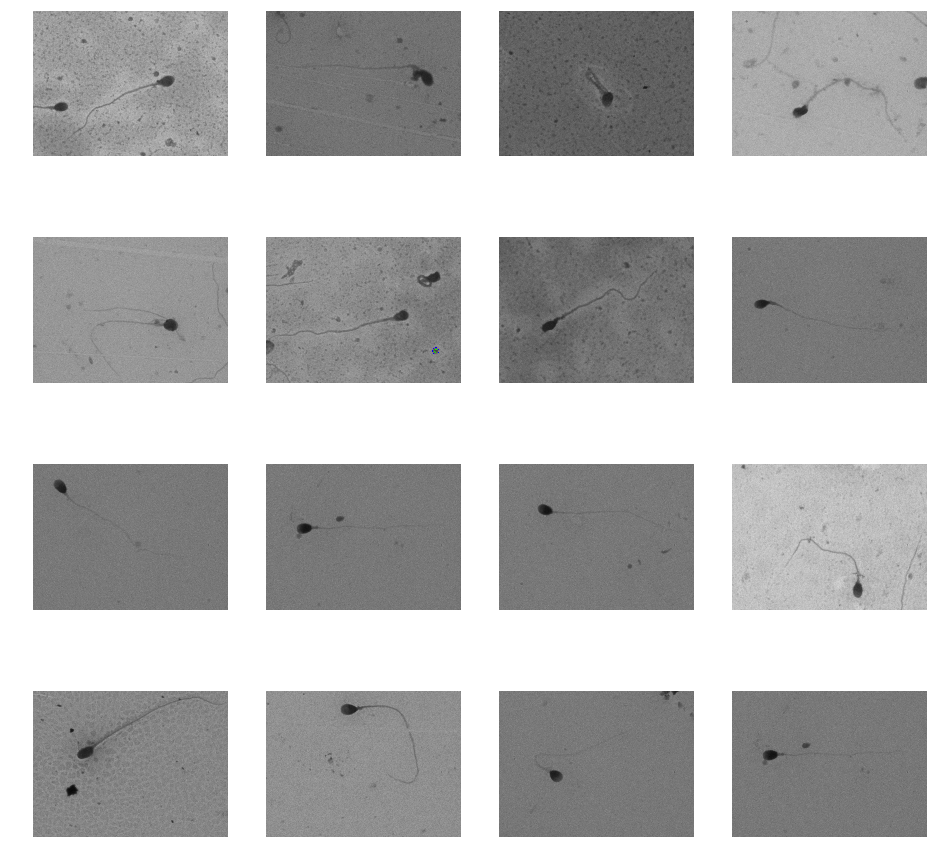

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_abnorm_pix = [os.path.join(train_abnorm_dir, fname) 
                for fname in train_abnorm_fnames[pic_index-8:pic_index]]
next_norm_pix = [os.path.join(train_norm_dir, fname) 
                for fname in train_norm_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_abnorm_pix+next_norm_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Small Convnet 

architecture: stack 3 {convolution + relu + maxpooling} modules. Our convolutions operate on 3x3 windows and our maxpooling layers operate on 2x2 windows. Our first convolution extracts 16 filters, the following one extracts 32 filters, and the last one extracts 64 filters.



In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [0]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [21]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)


# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
__________

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

### Data Preprocessing



In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# augmentation

# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 32 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')




Found 524 images belonging to 2 classes.
Found 131 images belonging to 2 classes.


### Training


In [27]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=25,  # 500 images = batch_size * steps 500/20 
      epochs=15,
      validation_data=validation_generator,
      validation_steps=6,  # 131 images = batch_size * steps 131/20 =
      verbose=2)

Epoch 1/15
7/7 [==============================] - 2s 282ms/step - loss: 0.5120 - acc: 0.7939
 - 9s - loss: 0.5745 - acc: 0.7424 - val_loss: 0.5120 - val_acc: 0.7939
Epoch 2/15
7/7 [==============================] - 2s 270ms/step - loss: 0.5019 - acc: 0.7939
 - 8s - loss: 0.6303 - acc: 0.7424 - val_loss: 0.5019 - val_acc: 0.7939
Epoch 3/15
7/7 [==============================] - 2s 266ms/step - loss: 0.4975 - acc: 0.7939
 - 8s - loss: 0.5847 - acc: 0.7424 - val_loss: 0.4975 - val_acc: 0.7939
Epoch 4/15
7/7 [==============================] - 2s 281ms/step - loss: 0.5217 - acc: 0.7939
 - 8s - loss: 0.6117 - acc: 0.7366 - val_loss: 0.5217 - val_acc: 0.7939
Epoch 5/15
7/7 [==============================] - 2s 282ms/step - loss: 0.5208 - acc: 0.7939
 - 8s - loss: 0.6400 - acc: 0.7424 - val_loss: 0.5208 - val_acc: 0.7939
Epoch 6/15
7/7 [==============================] - 2s 265ms/step - loss: 0.5665 - acc: 0.7939
 - 8s - loss: 0.5646 - acc: 0.7424 - val_loss: 0.5665 - val_acc: 0.7939
Epoch 7/15

### Visualizing Intermediate Representations


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in divide


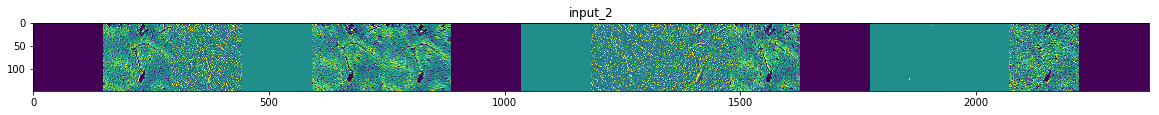

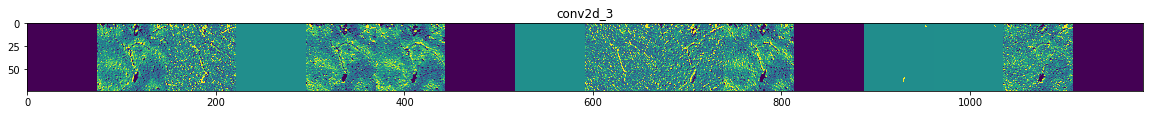

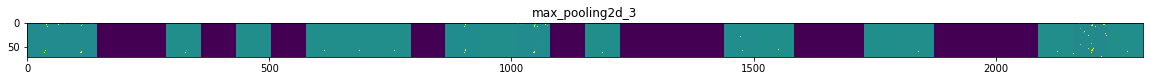

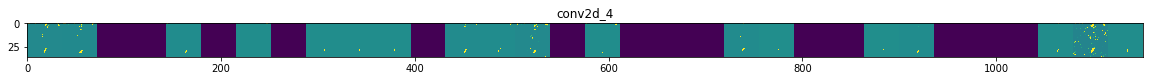

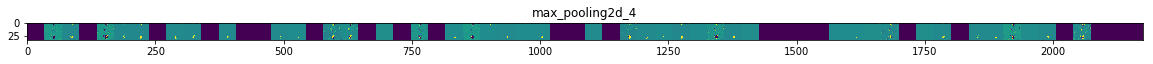

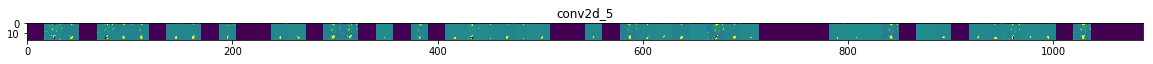

In [25]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
abnorm_img_files = [os.path.join(train_abnorm_dir, f) for f in train_abnorm_fnames]
norm_img_files = [os.path.join(train_norm_dir, f) for f in train_norm_fnames]
img_path = random.choice(abnorm_img_files + norm_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Evaluating Accuracy and Loss for the Model


Text(0.5,1,'Training and validation loss')

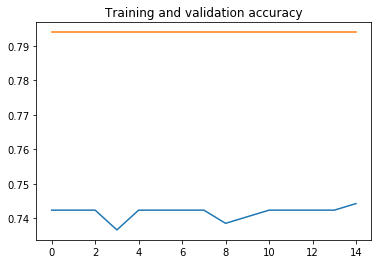

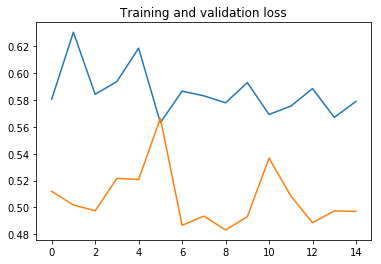

In [28]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)